In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv('Kolkata.csv',usecols=['Price','Area','Location','No. of Bedrooms','CarParking'])

In [3]:
df.head()

Price  Area     Location  No. of Bedrooms  CarParking
0  2235000  1016      Barasat                3           0
1  3665999  1111    Keshtopur                2           0
2  3774000  1020     Rajarhat                2           0
3  2524000   935  Narendrapur                2           0
4  8300000  1956     New Town                3           1

In [4]:
df.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
CarParking         0
dtype: int64

In [5]:
len(df['Location'].value_counts())

308

In [6]:
df['No. of Bedrooms'].value_counts()

3    3128
2    2622
4     512
1     198
5      38
6       8
9       1
Name: No. of Bedrooms, dtype: int64

In [7]:
location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending = False)

In [8]:
location_stats

Location
New Town                              711
Rajarhat                              405
Tangra                                369
Dum Dum                               316
Garia                                 307
                                     ... 
Lohar Bridge                            1
Mission Pally                           1
Mohisbathan                             1
Moore Avenue                            1
Acharya Jagadish Chandra Bose Road      1
Name: Location, Length: 308, dtype: int64

In [9]:
location_stats_less_than_50 = location_stats[location_stats<=50]

In [10]:
location_stats_less_than_50

Location
Haltu                                 47
Lake Town                             45
Topsia                                43
Kaikhali                              36
Hussainpur                            35
                                      ..
Lohar Bridge                           1
Mission Pally                          1
Mohisbathan                            1
Moore Avenue                           1
Acharya Jagadish Chandra Bose Road     1
Name: Location, Length: 282, dtype: int64

In [11]:
308-282

26

In [12]:
df['Location'] = df['Location'].apply(lambda x:'other' if x in location_stats_less_than_50 else x)

In [13]:
df['Location'].value_counts()

other                      1830
New Town                    711
Rajarhat                    405
Tangra                      369
Dum Dum                     316
Garia                       307
Howrah                      276
Behala                      232
Tollygunge                  201
Madhyamgram                 200
Narendrapur                 190
Keshtopur                   182
Alipore                     176
Sonarpur                    141
Mukundapur                  123
Sodepur                      98
Kasba                        93
New Alipore                  87
Salt Lake City               81
Tiljala                      78
Bansdroni                    64
Nayabad                      64
Barisha Purba Para Road      63
Uttarpara Kotrung            58
Ballygunge                   55
Konnagar                     55
Madurdaha Hussainpur         52
Name: Location, dtype: int64

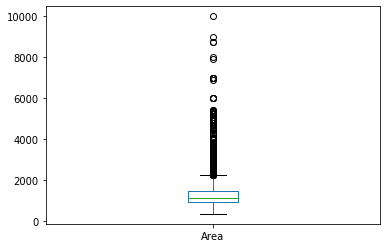

In [14]:
df['Area'].plot(kind='box')

In [15]:
df['CarParking'].value_counts()

9    6432
0      41
1      34
Name: CarParking, dtype: int64

In [16]:
df['CarParking'] = df['CarParking'].apply(lambda x:random.choice([1,0]) if x==9 else x)

In [29]:
df['CarParking'].value_counts()

1    3297
0    3210
Name: CarParking, dtype: int64

In [28]:
dummies = pd.get_dummies(df['Location'])

KeyError: 'Location'

In [19]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis=1)

In [20]:
df.head()

Price  Area     Location  No. of Bedrooms  CarParking  Alipore  \
0  2235000  1016        other                3           0        0   
1  3665999  1111    Keshtopur                2           0        0   
2  3774000  1020     Rajarhat                2           0        0   
3  2524000   935  Narendrapur                2           0        0   
4  8300000  1956     New Town                3           1        0   

   Ballygunge  Bansdroni  Barisha Purba Para Road  Behala  ...  New Alipore  \
0           0          0                        0       0  ...            0   
1           0          0                        0       0  ...            0   
2           0          0                        0       0  ...            0   
3           0          0                        0       0  ...            0   
4           0          0                        0       0  ...            0   

   New Town  Rajarhat  Salt Lake City  Sodepur  Sonarpur  Tangra  Tiljala  \
0         0         0               0        0         0       0        0   
1         0         0               0        0         0       0        0   
2         0         1               0        0         0       0        0   
3         0         0               0        0         0       0        0   
4         1         0               0        0         0       0        0   

   Tollygunge  Uttarpara Kotrung  
0           0                  0  
1           0                  0  
2           0                  0  
3           0                  0  
4           0                  0  

[5 rows x 31 columns]

In [30]:
df.drop('Location',axis=1,inplace=True)

KeyError: "['Location'] not found in axis"

In [22]:
df.shape

(6507, 30)

In [23]:
df['Area'] = df['Area'].astype('float')

In [24]:
df['Price'] = df['Price']/100000

In [25]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
r2_score(y_test,y_pred)

0.05106760996918025

In [32]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
    
cv = ShuffleSplit(n_splits = 15,test_size = 0.25,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.05106761, 0.14599344, 0.08945261, 0.09525133, 0.17168296,
       0.13616077, 0.12553321, 0.15607712, 0.10326792, 0.07714684,
       0.0506246 , 0.11910499, 0.08378152, 0.13989771, 0.13109233])

In [33]:
def predict_price(location,sqft,cp,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = cp
    
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [35]:
predict_price('New Town',1956,3,1)

100.61504712774172

In [36]:
import pickle

with open('kolkata_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [37]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("kolkata_columns.json","w") as f:
    f.write(json.dumps(columns))